In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split,cross_val_score
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from skopt.plots import plot_objective, plot_convergence
from skopt import gp_minimize

In [3]:
db = pd.read_excel('PerovskiteDatabase.xlsx',header=1)
db

,ID,Material,Cs,MA,FA,Rb,Pb,Cd,Bi,Sn,...,additional reference,Done By,Spacer,EQE,IQE,Device structure,HTL,ETL,Band gap type,excitonic feature
0,1,CsPbI3,1.0,0.0,0.0,0.0,1.00,0.0,0.0,0,...,https://materialsproject.org/materials/mp-1069...,Pritish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,CsPbI3,1.0,0.0,0.0,0.0,1.00,0.0,0.0,0,...,https://materialsproject.org/materials/mp-1069...,Pritish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,CsPbBr3,1.0,0.0,0.0,0.0,1.00,0.0,0.0,0,...,NaN,Pritish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,CsPbBr3,1.0,0.0,0.0,0.0,1.00,0.0,0.0,0,...,NaN,Pritish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,MAPbI3,0.0,1.0,0.0,0.0,1.00,0.0,0.0,0,...,https://materials.hybrid3.duke.edu/materials/24,Pritish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,417,CsPbBr3,1.0,0.0,0.0,0.0,1.00,0.0,0.0,0,...,NaN,Ivan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,418,CsPbBr3,1.0,0.0,0.0,0.0,1.00,0.0,0.0,0,...,NaN,Ivan,SiO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417,419,CsPbI2Br,1.0,0.0,0.0,0.0,1.00,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,420,CsPb0.95Eu0.05I2Br,1.0,0.0,0.0,0.0,0.95,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 77 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    420 non-null    int64  
 1   Material              420 non-null    object 
 2   Cs                    420 non-null    float64
 3   MA                    420 non-null    float64
 4   FA                    420 non-null    float64
 5   Rb                    420 non-null    float64
 6   Pb                    420 non-null    float64
 7   Cd                    420 non-null    float64
 8   Bi                    420 non-null    float64
 9   Sn                    420 non-null    int64  
 10  Na                    420 non-null    float64
 11  In                    420 non-null    float64
 12  Sb                    420 non-null    float64
 13  K                     420 non-null    int64  
 14  Cu                    420 non-null    float64
 15  Ag                    4

In [5]:
db2=db._get_numeric_data()
db2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 420 non-null    int64  
 1   Cs                 420 non-null    float64
 2   MA                 420 non-null    float64
 3   FA                 420 non-null    float64
 4   Rb                 420 non-null    float64
 5   Pb                 420 non-null    float64
 6   Cd                 420 non-null    float64
 7   Bi                 420 non-null    float64
 8   Sn                 420 non-null    int64  
 9   Na                 420 non-null    float64
 10  In                 420 non-null    float64
 11  Sb                 420 non-null    float64
 12  K                  420 non-null    int64  
 13  Cu                 420 non-null    float64
 14  Ag                 420 non-null    float64
 15  Mn                 420 non-null    float64
 16  Eu                 420 non

In [6]:
df=pd.concat([db2.iloc[:,1:24],db2.iloc[:,27:29], db2.iloc[:,37:40], db2.iloc[:,41:43], db2.iloc[:,44]], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cs              420 non-null    float64
 1   MA              420 non-null    float64
 2   FA              420 non-null    float64
 3   Rb              420 non-null    float64
 4   Pb              420 non-null    float64
 5   Cd              420 non-null    float64
 6   Bi              420 non-null    float64
 7   Sn              420 non-null    int64  
 8   Na              420 non-null    float64
 9   In              420 non-null    float64
 10  Sb              420 non-null    float64
 11  K               420 non-null    int64  
 12  Cu              420 non-null    float64
 13  Ag              420 non-null    float64
 14  Mn              420 non-null    float64
 15  Eu              420 non-null    float64
 16  Zn              420 non-null    float64
 17  Sc              420 non-null    flo

In [7]:
fdf=df.dropna()

In [8]:
start = fdf.iloc[:,:-1]
start.head()

,Cs,MA,FA,Rb,Pb,Cd,Bi,Sn,Na,In,...,Cl,Br,I,S/D/T,Dimensionality,RA,RB,RX,Goldschmidt's,Bartel et al
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,3.0,1,0,188.0,119.0,220.0,0.851160,4.303295
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,3.0,1,0,188.0,119.0,220.0,0.851160,4.303295
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,...,0.0,3.0,0.0,1,0,188.0,119.0,196.0,0.862127,4.101614
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,...,0.0,3.0,0.0,1,0,188.0,119.0,196.0,0.862127,4.101614
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,3.0,1,0,270.0,119.0,220.0,1.022226,3.618069


In [9]:
Xnew=start.drop_duplicates()
Xnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 419
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cs              182 non-null    float64
 1   MA              182 non-null    float64
 2   FA              182 non-null    float64
 3   Rb              182 non-null    float64
 4   Pb              182 non-null    float64
 5   Cd              182 non-null    float64
 6   Bi              182 non-null    float64
 7   Sn              182 non-null    int64  
 8   Na              182 non-null    float64
 9   In              182 non-null    float64
 10  Sb              182 non-null    float64
 11  K               182 non-null    int64  
 12  Cu              182 non-null    float64
 13  Ag              182 non-null    float64
 14  Mn              182 non-null    float64
 15  Eu              182 non-null    float64
 16  Zn              182 non-null    float64
 17  Sc              182 non-null    flo

In [10]:
indices = Xnew.index

In [11]:
indices

Int64Index([  0,   2,   4,  10,  11,  12,  16,  17,  18,  19,
            ...
            395, 396, 397, 398, 399, 400, 401, 414, 418, 419],
           dtype='int64', length=182)

In [12]:
dropped = fdf.loc[db2.index[indices]]
drop_=dropped.reset_index()
drop_

,index,Cs,MA,FA,Rb,Pb,Cd,Bi,Sn,Na,...,Br,I,S/D/T,Dimensionality,RA,RB,RX,Goldschmidt's,Bartel et al,Eg
0,0,1.000,0.00,0.0,0.000,1.000000,0.00,0.0,0,0.0,...,0.00,3.0,1,0,188.0,119.000000,220.00,0.851160,4.303295,1.850746
1,2,1.000,0.00,0.0,0.000,1.000000,0.00,0.0,0,0.0,...,3.00,0.0,1,0,188.0,119.000000,196.00,0.862127,4.101614,2.455446
2,4,0.000,1.00,0.0,0.000,1.000000,0.00,0.0,0,0.0,...,0.00,3.0,1,0,270.0,119.000000,220.00,1.022226,3.618069,1.722222
3,10,1.000,0.00,0.0,0.000,0.920000,0.08,0.0,0,0.0,...,3.00,0.0,1,0,188.0,117.080000,196.00,0.867414,4.064678,2.500000
4,11,1.000,0.00,0.0,0.000,0.880000,0.12,0.0,0,0.0,...,3.00,0.0,1,0,188.0,116.120000,196.00,0.870082,4.048131,2.561983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,400,1.000,0.00,0.0,0.000,0.990982,0.00,0.0,0,0.0,...,1.18,0.0,1,0,188.0,118.675352,186.90,0.867656,4.018320,2.725275
178,401,1.000,0.00,0.0,0.000,0.990099,0.00,0.0,0,0.0,...,2.55,0.0,1,0,188.0,118.643564,193.75,0.864226,4.075396,2.470120
179,414,0.025,0.25,0.7,0.025,1.000000,0.00,0.0,0,0.0,...,0.00,3.0,1,3,271.8,119.000000,220.00,1.025981,3.614104,1.510000
180,418,1.000,0.00,0.0,0.000,0.950000,0.00,0.0,0,0.0,...,1.00,2.0,1,3,188.0,118.900000,212.00,0.854897,4.234127,1.925466


In [13]:
X = drop_.iloc[:,1:-1]
X.head()

,Cs,MA,FA,Rb,Pb,Cd,Bi,Sn,Na,In,...,Cl,Br,I,S/D/T,Dimensionality,RA,RB,RX,Goldschmidt's,Bartel et al
0,1.0,0.0,0.0,0.0,1.00,0.00,0.0,0,0.0,0.0,...,0.0,0.0,3.0,1,0,188.0,119.00,220.0,0.851160,4.303295
1,1.0,0.0,0.0,0.0,1.00,0.00,0.0,0,0.0,0.0,...,0.0,3.0,0.0,1,0,188.0,119.00,196.0,0.862127,4.101614
2,0.0,1.0,0.0,0.0,1.00,0.00,0.0,0,0.0,0.0,...,0.0,0.0,3.0,1,0,270.0,119.00,220.0,1.022226,3.618069
3,1.0,0.0,0.0,0.0,0.92,0.08,0.0,0,0.0,0.0,...,0.0,3.0,0.0,1,0,188.0,117.08,196.0,0.867414,4.064678
4,1.0,0.0,0.0,0.0,0.88,0.12,0.0,0,0.0,0.0,...,0.0,3.0,0.0,1,0,188.0,116.12,196.0,0.870082,4.048131


In [14]:
y = pd.DataFrame(drop_.iloc[:,-1])
y.head()

,Eg
0,1.850746
1,2.455446
2,1.722222
3,2.500000
4,2.561983


In [15]:
scaler = MinMaxScaler(feature_range = (1,2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s',scaler),('p',power)])

X_transform = pipeline.fit_transform(X)
y_transform = y.to_numpy().ravel()
X_transform

array([[-0.0342427 , -0.40637115, -0.29942126, ...,  1.47104141,
        -1.48194272,  1.70440581],
       [-0.0342427 , -0.40637115, -0.29942126, ...,  0.26332956,
        -1.06554591,  0.75958559],
       [-1.57487595,  2.50517925, -0.29942126, ...,  1.47104141,
         1.34129016, -1.18516134],
       ...,
       [-1.52631803,  1.85727741,  3.37359789, ...,  1.47104141,
         1.36200932, -1.1992207 ],
       [-0.0342427 , -0.40637115, -0.29942126, ...,  1.16172051,
        -1.332422  ,  1.37157646],
       [-0.0342427 , -0.40637115, -0.29942126, ...,  0.26332956,
        -0.88012971,  0.58872125]])

In [16]:
features = X.columns.values
features

array(['Cs', 'MA', 'FA', 'Rb', 'Pb', 'Cd', 'Bi', 'Sn', 'Na', 'In', 'Sb',
       'K', 'Cu', 'Ag', 'Mn', 'Eu', 'Zn', 'Sc', 'La', 'Y', 'Cl', 'Br',
       'I', 'S/D/T', 'Dimensionality', 'RA', 'RB', 'RX', "Goldschmidt's",
       'Bartel et al'], dtype=object)

In [17]:
response = y.columns.values
response

array(['Eg'], dtype=object)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y_transform, test_size=0.2, random_state=0)

In [19]:
from sklearn import metrics

# Function to return the mean of the metric for a particular metric name
def metrics_mean(y_ac, y_pred, metric):
    scores = []
    if metric == 'rmse':
        score = np.sqrt(metrics.mean_squared_error(y_ac, y_pred))
    elif metric == 'mae':
        score = metrics.mean_absolute_error(y_ac, y_pred)
    elif metric == 'R2':
        score = metrics.r2_score(y_ac, y_pred)
    else:
        score = np.inf
    scores.append(score)
    return np.mean(scores)

# Final function "plot" to plot the train-train predicted values, test-test predicted values and the metrics for
# each ML algorithm used
def plot(regressor_name, y_train, y_train_pred, y_test, y_test_pred):

    #y_train = scalerY.inverse_transform(y_train)
    #y_train_pred = scalerY.inverse_transform(y_train_pred)
    #y_test = scalerY.inverse_transform(y_test)
    #y_test_pred = scalerY.inverse_transform(y_test_pred)
    
    plt.figure(figsize = (14,6))
    
    # First subplot - training set
    ax1 = plt.subplot(121)
    
    # plot "predicted values vs actual values and true predictions" graph for train set using first prediction
    y_pred_train = pd.DataFrame(y_train_pred)
    plt.scatter(y_train,y_pred_train)
    plt.plot(y_train,y_train,'k--',lw=3)
    
    plt.xlabel('True Value',fontsize=16)
    plt.ylabel('Predicted Value',fontsize=16)
    
    # calculate means of the metrics
    rmse = metrics_mean(y_train,y_pred_train,'rmse')  
    mae = metrics_mean(y_train,y_pred_train,'mae')
    R2 = metrics_mean(y_train,y_pred_train,'R2')
    
    # regressor name with all metrics in the title
    plt.title(regressor_name+' training set'
              +'\nRMSE: '+str(round(rmse,3))
              +'\nMAE: '+str(round(mae,3))
              +'\nR2: '+str(round(R2,3)),fontsize=16)
    
    plt.rc('xtick',labelsize=10)
    plt.rc('ytick',labelsize=10)
   
    # Second subplot - test set
    ax2 = plt.subplot(122)
    
    # plot "predicted values vs actual values and true predictions" graph for test set using first prediction
    y_pred_test = pd.DataFrame(y_test_pred)
    plt.scatter(y_test,y_pred_test)
    plt.plot(y_test,y_test,'k--',lw=3)
    
    plt.xlabel('True Value',fontsize=16)
    plt.ylabel('Predicted Value',fontsize=16)
    
    # calculate means of the metrics
    rmse = metrics_mean(y_test,y_pred_test,'rmse')  
    mae = metrics_mean(y_test,y_pred_test,'mae')
    R2 = metrics_mean(y_test,y_pred_test,'R2')
    
    # regressor name with all metrics in the title
    plt.title(regressor_name+' test set'
              +'\nRMSE: '+str(round(rmse,3))
              +'\nMAE: '+str(round(mae,3))
              +'\nR2: '+str(round(R2,3)),fontsize=16)
    
    plt.rc('xtick',labelsize=10)
    plt.rc('ytick',labelsize=10)
    
    plt.show()

    # return metrics for test set to record the errors across different algorithms
    return rmse, mae, R2

In [20]:
rmse_scores = {}
mae_scores = {}
R2_scores = {}

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

/Users/pritish/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


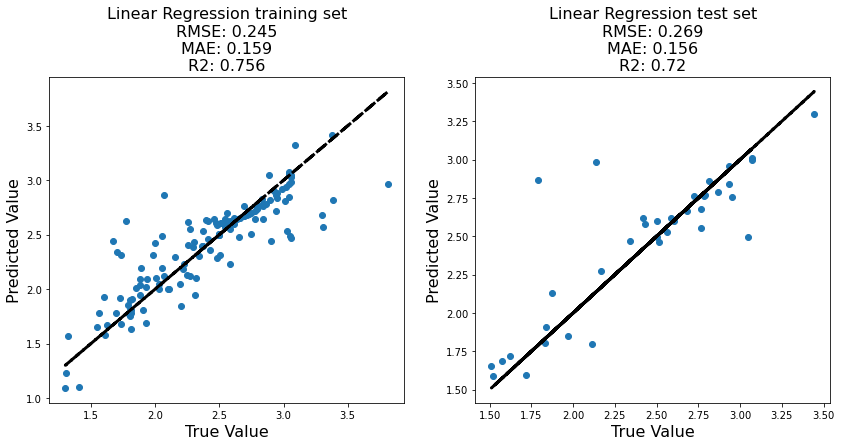

In [22]:
# create a Linear Regression regressor
lregressor = LinearRegression()

# fit and predict all the train/test arrays
lregressor.fit(X_train,y_train)
y_pred_train = lregressor.predict(X_train)
y_pred_test = lregressor.predict(X_test)

# plot the training results
rmse, mae, R2 = plot('Linear Regression', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['Linear Regression'] = rmse
mae_scores['Linear Regression'] = mae
R2_scores['Linear Regression'] = R2

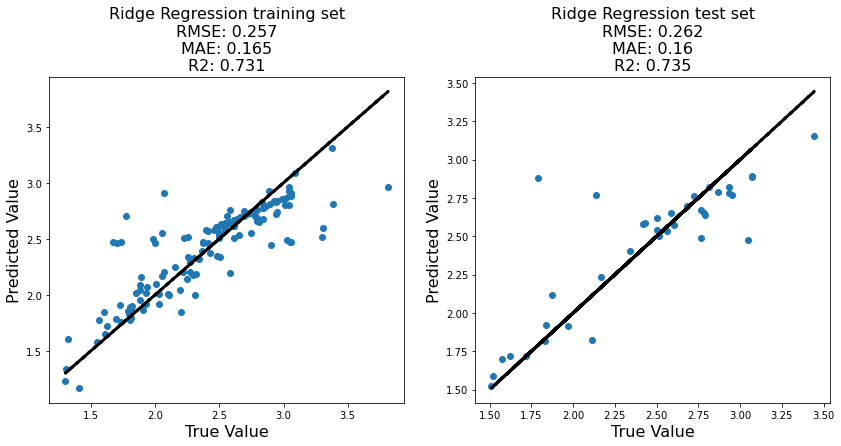

In [23]:
#RidgeCV for best alpha
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(alphas = np.logspace(-6,6,104))
ridgecv.fit(X_train, y_train)

# Ridge Regression
rregressor = Ridge(alpha = ridgecv.alpha_)

rregressor.fit(X_train,y_train)
y_pred_train = rregressor.predict(X_train)
y_pred_test = rregressor.predict(X_test)

rmse, mae, R2 = plot('Ridge Regression', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['Ridge Regression'] = rmse
mae_scores['Ridge Regression'] = mae
R2_scores['Ridge Regression'] = R2

/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06746688153909997, tolerance: 0.0026436851971161136
  model = cd_fast.enet_coordinate_descent_gram(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.24657311010500926, tolerance: 0.0026436851971161136
  model = cd_fast.enet_coordinate_descent_gram(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.34865650002974435, tolerance: 0.0026436851971161136
  model = cd_fast.enet_coordinate_descent_gram(
/Users/pritish/miniforge3/lib/python3.9/sit

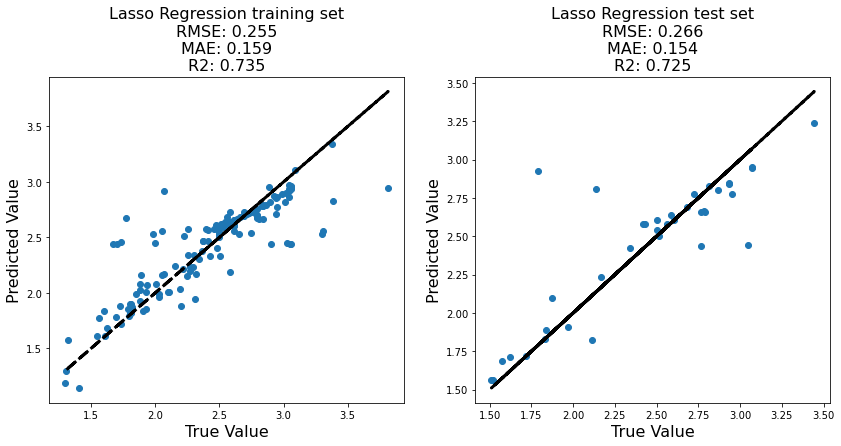

In [24]:
#LassoCV for best alpha
from sklearn.linear_model import LassoCV

lassocv = LassoCV(alphas = np.logspace(-6,6,104))
lassocv.fit(X_train, y_train)

# Lasso Regression
lsregressor = Lasso(alpha = lassocv.alpha_)

lsregressor.fit(X_train,y_train)
y_pred_train = lsregressor.predict(X_train)
y_pred_test = lsregressor.predict(X_test)

rmse, mae, R2 = plot('Lasso Regression', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['Lasso Regression'] = rmse
mae_scores['Lasso Regression'] = mae
R2_scores['Lasso Regression'] = R2

In [25]:
# Hyperparameter optimization of k-Neighbors Regressor
knregressor = KNeighborsRegressor()

knr_space  = [Categorical(categories=[i for i in range(1,52,2)], name='n_neighbors'),
              Categorical(categories=['auto', 'brute', 'ball_tree', 'kd_tree'], name='algorithm'),
              Integer(1, 50, name='leaf_size'),
              Integer(1, 11, name='p')]

@use_named_args(knr_space)
def objective(**params):
    knregressor.set_params(**params)
    return -np.mean(cross_val_score(knregressor, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="r2"))

knr_gp = gp_minimize(objective, knr_space, n_calls=100, n_jobs=-1, random_state=0)

KeyboardInterrupt: 

In [ ]:
plot_convergence(knr_gp)

In [ ]:
plot_objective(knr_gp)

In [ ]:
opt_par = knr_gp.x

# use hyper-parameters from optimization 
n_neighbors = opt_par[0]
algorithm = opt_par[1] 
p = opt_par[2]

#K-Nearest Regression
knregressor = KNeighborsRegressor(n_neighbors=n_neighbors,algorithm=algorithm,p=p)

knregressor.fit(X_train,y_train)
y_pred_train = knregressor.predict(X_train)
y_pred_test = knregressor.predict(X_test)

rmse, mae, R2 = plot('K Nearest Neighbors', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['K Nearest Neighbors'] = rmse
mae_scores['K Nearest Neighbors'] = mae
R2_scores['K Nearest Neighbors'] = R2

In [ ]:
# Hyperparameter optimization of Support Vector Regressor
svregressor = SVR()

svr_space  = [Categorical(categories=['linear', 'rbf', 'sigmoid'], name='kernel'),
              Real(0.0001, 10, "log-uniform", name='gamma'),
              Real(0.01, 100, name='C'),
              Real(0,100, name='coef0')]

@use_named_args(svr_space)
def objective(**params):
    svregressor.set_params(**params)
    return -np.mean(cross_val_score(svregressor, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="r2"))

svr_gp = gp_minimize(objective, svr_space, n_calls=100, n_jobs=-1, random_state=0)

In [ ]:
plot_convergence(svr_gp)

In [ ]:
plot_objective(svr_gp)

In [26]:
opt_par = svr_gp.x

# use hyper-parameters from optimization 
kernel = opt_par[0]
gamma = opt_par[1]
C = opt_par[2]

# Decision Tree Regression
svregressor = SVR(kernel=kernel, gamma=gamma, C=C)

svregressor.fit(X_train,y_train)
y_pred_train = svregressor.predict(X_train)
y_pred_test = svregressor.predict(X_test)

rmse, mae, R2 = plot('Support Vector', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['Support Vector'] = rmse
mae_scores['Support Vector'] = mae
R2_scores['Support Vector'] = R2

NameError: name 'svr_gp' is not defined

In [22]:
# Hyperparameter optimization of Decision Tree Regressor
dtregressor = DecisionTreeRegressor(random_state=0)

dtr_space  = [Categorical(categories=['squared_error', 'absolute_error', 'friedman_mse'], name='criterion'),
              Categorical(categories=['best', 'random'], name='splitter'),
              Integer(1, 100, name='max_depth')]

@use_named_args(dtr_space)
def objective(**params):
    dtregressor.set_params(**params)
    return -np.mean(cross_val_score(dtregressor, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="r2"))

dtr_gp = gp_minimize(objective, dtr_space, n_calls=100, n_jobs=-1, random_state=0)

/Users/pritish/miniforge3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/pritish/miniforge3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/pritish/miniforge3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/pritish/miniforge3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/pritish/miniforge3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.w

<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

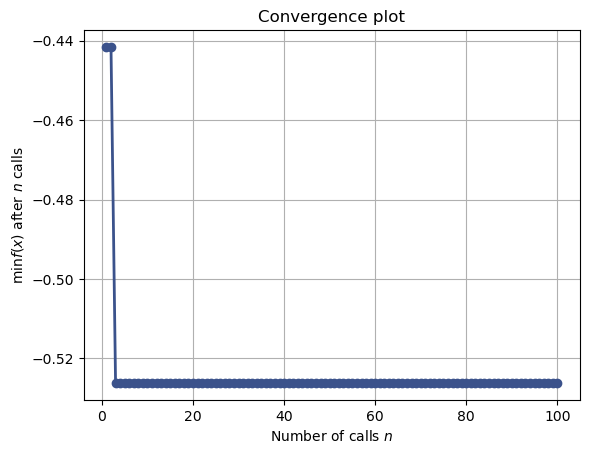

In [23]:
plot_convergence(dtr_gp)

array([[<AxesSubplot:xlabel='criterion', ylabel='Partial dependence'>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='splitter'>,
        <AxesSubplot:xlabel='splitter', ylabel='Partial dependence'>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='criterion', ylabel='max_depth'>,
        <AxesSubplot:xlabel='splitter'>,
        <AxesSubplot:xlabel='max_depth', ylabel='Partial dependence'>]],
      dtype=object)

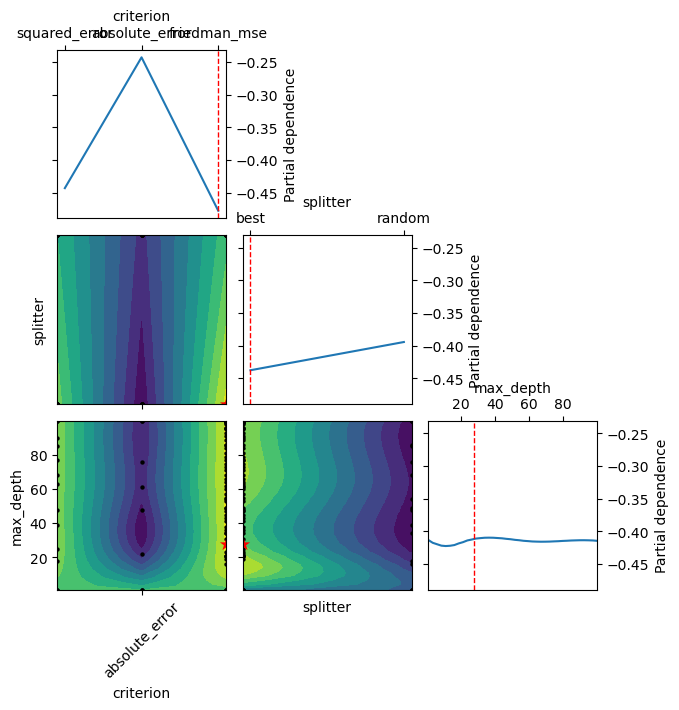

In [24]:
plot_objective(dtr_gp)

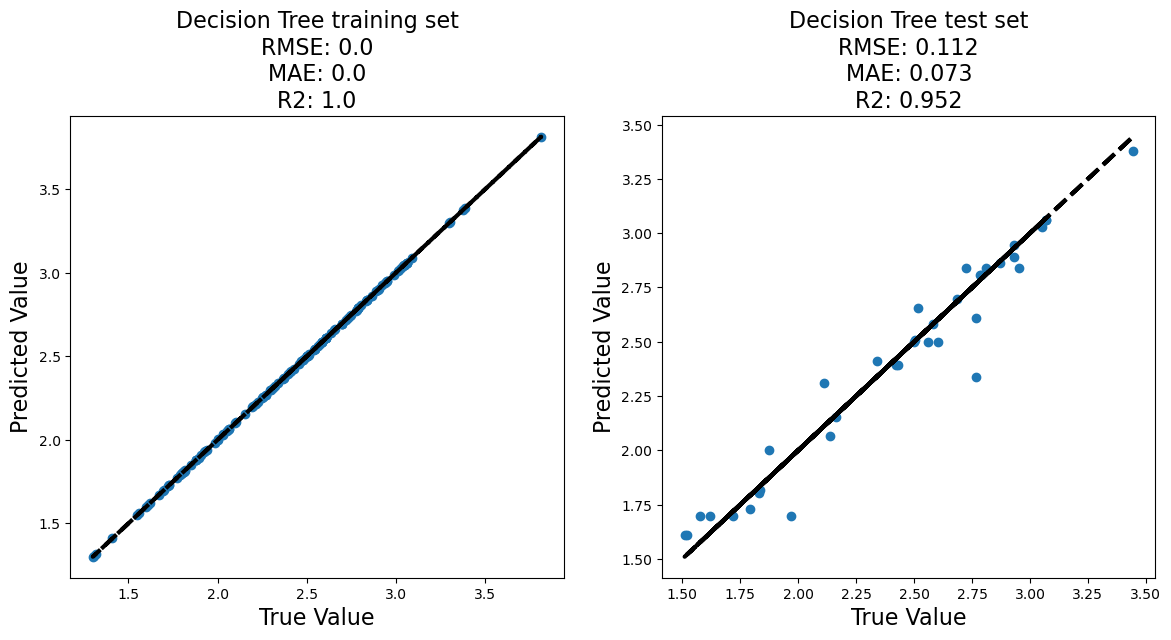

In [25]:
opt_par = dtr_gp.x

# use hyper-parameters from optimization 
criterion = opt_par[0]
splitter = opt_par[1]
max_depth = opt_par[2]

# Decision Tree Regression
dtregressor = DecisionTreeRegressor(criterion=criterion, splitter=splitter, max_depth=max_depth, random_state=0)

dtregressor.fit(X_train,y_train)
y_pred_train = dtregressor.predict(X_train)
y_pred_test = dtregressor.predict(X_test)

rmse, mae, R2 = plot('Decision Tree', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['Decision Tree'] = rmse
mae_scores['Decision Tree'] = mae
R2_scores['Decision Tree'] = R2

In [ ]:
# Hyperparameter optimization of Gradient Boosting Regressor
gbregressor = GradientBoostingRegressor(random_state=0)

gbr_space  = [Real(0.005, 0.9, "log-uniform", name='learning_rate'),
              Categorical(categories=['squared_error', 'absolute_error', 'huber', 'quantile'], name='loss'),
              Integer(1, 1000, name='n_estimators'),
              Integer(1, 50, name='max_depth'),
              Real(0.005, 0.9, "log-uniform", name='alpha')]

@use_named_args(gbr_space)
def objective(**params):
    gbregressor.set_params(**params)
    return -np.mean(cross_val_score(gbregressor, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="r2"))

gbr_gp = gp_minimize(objective, gbr_space, n_calls=100, n_jobs=-1, random_state=0)

In [ ]:
plot_convergence(gbr_gp)

In [ ]:
plot_objective(gbr_gp)

In [ ]:
opt_par = gbr_gp.x

# use hyper-parameters from optimization 
learning_rate = opt_par[0]
loss = opt_par[1] 
n_estimators = opt_par[2]
max_depth = opt_par[3]
alpha = opt_par[4]

# Gradient Boosting Regression
gbregressor = GradientBoostingRegressor(n_estimators = n_estimators, learning_rate = learning_rate,
                                        max_depth = max_depth, loss = loss, alpha= alpha, random_state=0)

gbregressor.fit(X_train,y_train)
y_pred_train = gbregressor.predict(X_train).reshape(-1, 1)
y_pred_test = gbregressor.predict(X_test).reshape(-1, 1)

rmse, mae, R2 = plot('Gradient Boosting', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['Gradient Boosting'] = rmse
mae_scores['Gradient Boosting'] = mae
R2_scores['Gradient Boosting'] = R2

In [26]:
# Hyperparameter optimization of Random Forest Regressor
rfregressor = RandomForestRegressor(random_state=0)

rfr_space  = [Integer(1, 2000, name='n_estimators'),
              Integer(1, 50, name='max_depth')]

@use_named_args(rfr_space)
def objective(**params):
    rfregressor.set_params(**params)
    return -np.mean(cross_val_score(rfregressor, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="r2"))

rfr_gp = gp_minimize(objective, rfr_space, n_calls=100, n_jobs=-1, random_state=0)

/Users/pritish/miniforge3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/pritish/miniforge3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/pritish/miniforge3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/pritish/miniforge3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/pritish/miniforge3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.w

<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

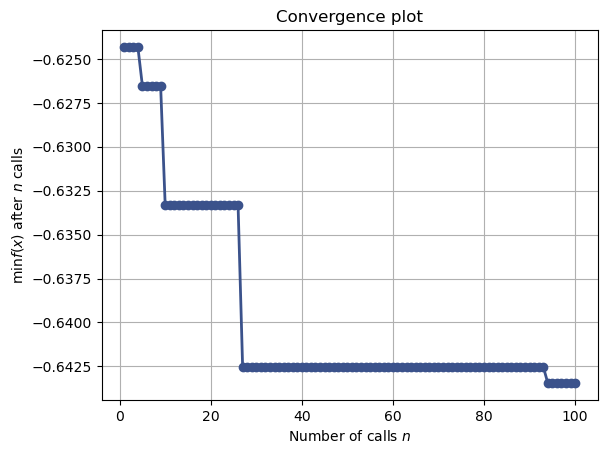

In [27]:
plot_convergence(rfr_gp)

array([[<AxesSubplot:xlabel='n_estimators', ylabel='Partial dependence'>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='n_estimators', ylabel='max_depth'>,
        <AxesSubplot:xlabel='max_depth', ylabel='Partial dependence'>]],
      dtype=object)

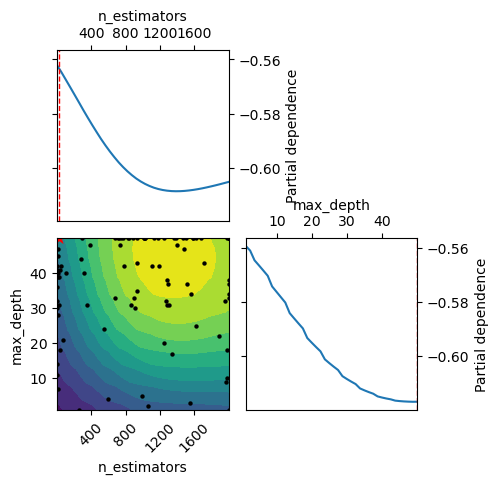

In [28]:
plot_objective(rfr_gp)

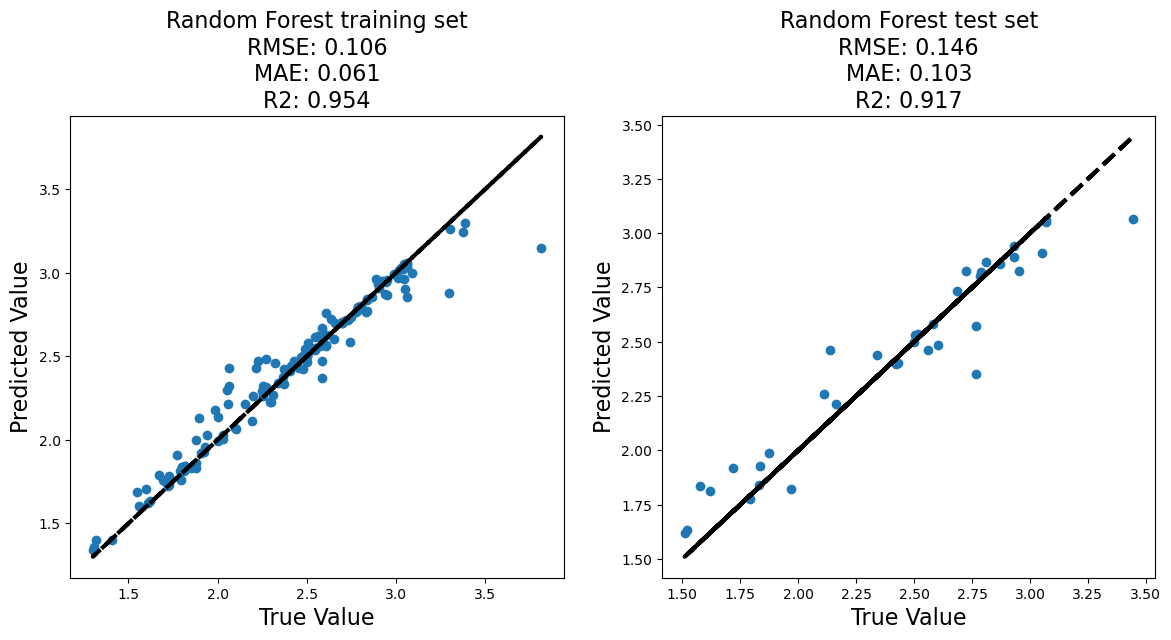

In [29]:
opt_par = rfr_gp.x

# use hyper-parameters from optimization 
n_estimators = opt_par[0]
max_depth = opt_par[1]

# Random Forest Regression
rfregressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=0)

rfregressor.fit(X_train,y_train)
y_pred_train = rfregressor.predict(X_train)
y_pred_test = rfregressor.predict(X_test)

rmse, mae, R2 = plot('Random Forest', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['Random Forest'] = rmse
mae_scores['Random Forest'] = mae
R2_scores['Random Forest'] = R2


In [ ]:
etregressor = ExtraTreesRegressor(random_state=0)

etr_space  = [Integer(1, 2000, name='n_estimators'),
              Integer(1, 50, name='max_depth')]

@use_named_args(etr_space)
def objective(**params):
    etregressor.set_params(**params)
    return -np.mean(cross_val_score(etregressor, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="r2"))

etr_gp = gp_minimize(objective, etr_space, n_calls=100, n_jobs=-1, random_state=0)

In [ ]:
plot_convergence(etr_gp)

In [ ]:
plot_objective(etr_gp)

In [ ]:
opt_par = etr_gp.x

# use hyper-parameters from optimization 
n_estimators = opt_par[0]
max_depth = opt_par[1]

# Extra Trees Regression
etregressor = ExtraTreesRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=0)

etregressor.fit(X_train,y_train)
y_pred_train = etregressor.predict(X_train)
y_pred_test = etregressor.predict(X_test)

rmse, mae, R2 = plot('Extra Trees', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['Extra Trees'] = rmse
mae_scores['Extra Trees'] = mae
R2_scores['Extra Trees'] = R2

In [ ]:
xgbregressor = XGBRegressor(random_state=0)

xgbr_space  = [Real(0.005, 1, "log-uniform", name='eta'),
              Integer(1, 200, name='n_estimators'),
              Integer(1, 20, name='max_depth'),
              Real(0.1, 1, "log-uniform", name='subsample'),
              Real(0.005, 1, "log-uniform", name='colsample_bytree')]

@use_named_args(xgbr_space)
def objective(**params):
    xgbregressor.set_params(**params)
    return -np.mean(cross_val_score(xgbregressor, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="r2"))

xgbr_gp = gp_minimize(objective, xgbr_space, n_calls=100, n_jobs=-1, random_state=0)

In [ ]:
plot_convergence(xgbr_gp)

In [ ]:
plot_objective(xgbr_gp)

In [ ]:
opt_par = xgbr_gp.x

# use hyper-parameters from optimization
eta= opt_par[0]
n_estimators = opt_par[1]
max_depth = opt_par[2]
subsample = opt_par[3]
colsample_bytree = opt_par[4]

#XGBoost Regression
xgbregressor = XGBRegressor(eta=eta, n_estimators=n_estimators, max_depth=max_depth, subsample=subsample,
                            colsample_bytree=colsample_bytree, random_state=0)
    
xgbregressor.fit(X_train,y_train)
y_pred_train = xgbregressor.predict(X_train)
y_pred_test = xgbregressor.predict(X_test)

rmse, mae, R2 = plot('XG Booster', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['XG Booster'] = rmse
mae_scores['XG Booster'] = mae
R2_scores['XG Booster'] = R2

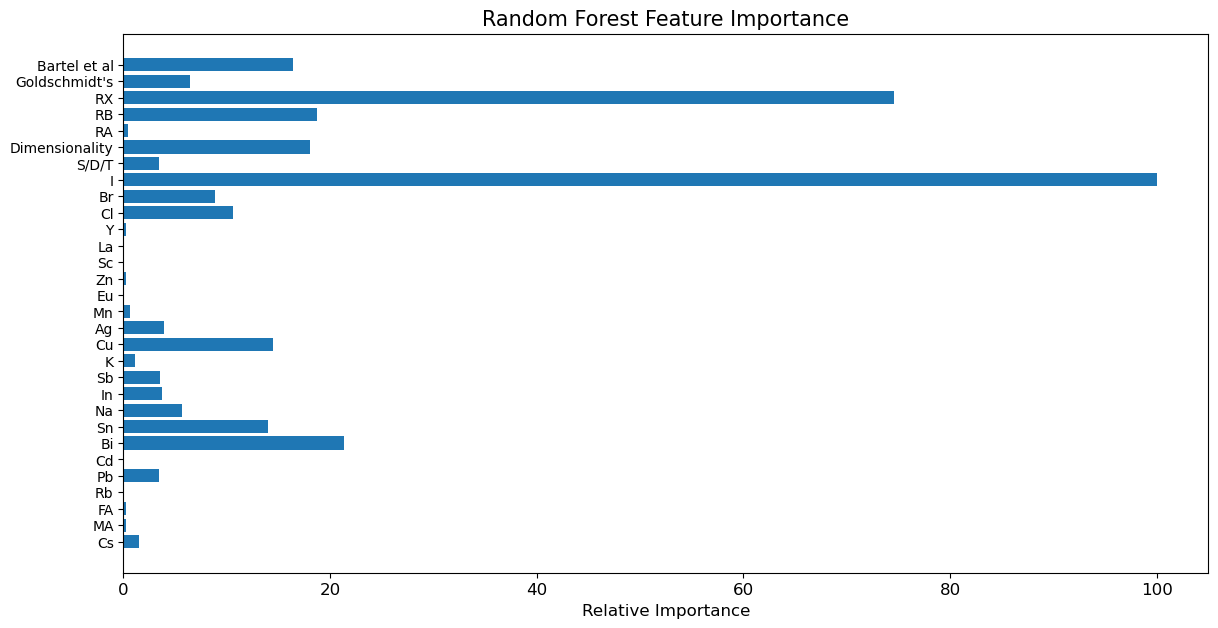

In [30]:
# defining feature importance function
def feature_importance(regr, features, title):
    
    # getting the feature importance
    feature_importance = regr.feature_importances_
    # make importances relative to max importance
    feature_importance_n = 100.0 * (feature_importance / feature_importance.max())
    plt.figure(figsize = (14,7))
    plt.barh(range(len(feature_importance)), feature_importance_n, tick_label=features)

    plt.xticks(fontsize=12)
    plt.xlabel('Relative Importance', fontsize=12)

    plt.title(title, fontsize=15)
    plt.show()
    
#feature_importance(gbregressor, features, 'Gradient Boosting Feature Importance')

feature_importance(rfregressor, features, 'Random Forest Feature Importance')

#feature_importance(etregressor, features, 'Extra Trees Feature Importance')

#feature_importance(xgbregressor, features, 'XGBoost Feature Importance')
#plt.savefig('FI.pdf')
#plt.show()

In [ ]:
plt.savefig('FI.pdf')

In [32]:
sb.set()

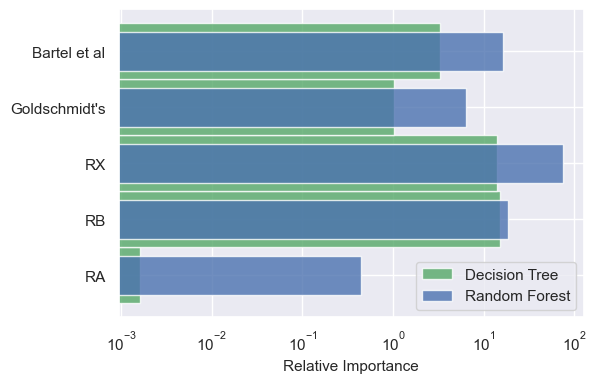

In [33]:
dt_feature_importance = dtregressor.feature_importances_
rf_feature_importance = rfregressor.feature_importances_
# make importances relative to max importance
dt_feature_importance_n = 100.0 * (dt_feature_importance / dt_feature_importance.max())
rf_feature_importance_n = 100.0 * (rf_feature_importance / rf_feature_importance.max())
fig, ax1=plt.subplots(1,1,figsize = (6,4))
ax1.barh(range(len(dt_feature_importance[-5:])), (dt_feature_importance_n[-5:]),color = 'g',
         tick_label=features[-5:],height=1,alpha=0.8,label='Decision Tree')
ax1.set_xlabel('Relative Importance', fontsize=11)
#ax1.set_title("Decision Tree (blue) and Random Forest (green) feature importances", fontsize=25)
ax1.tick_params(labelsize=11)
ax1.barh(range(len(dt_feature_importance[-5:])), (rf_feature_importance_n[-5:]),
         tick_label=features[-5:],height=0.7,alpha=0.8,label='Random Forest')
ax1.set_xlabel('Relative Importance', fontsize=11)
ax1.tick_params(labelsize=11)
ax1.label_outer()
ax1.legend()
ax1.set_xscale("log")
#plt.savefig('partial Feature_importance.pdf',dpi=600,bbox_inches='tight')

In [39]:
FI = pd.DataFrame(rf_feature_importance_n[-5:],columns={'RF'})
FI['DT']=dt_feature_importance_n[-5:]
FI['Features']=features[-5:]
FI.to_excel('ParFI.xlsx')

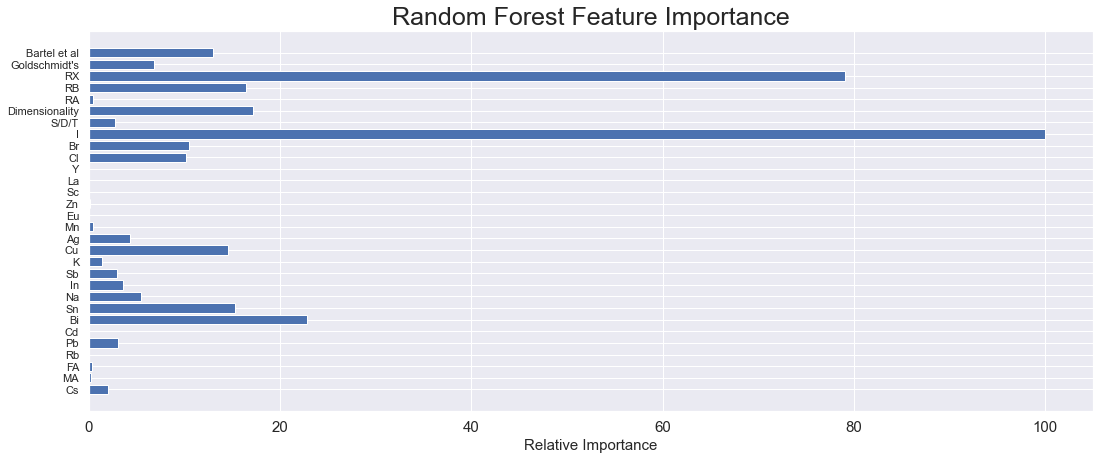

In [87]:
rf_feature_importance = rfregressor.feature_importances_
# make importances relative to max importance
rf_feature_importance_n = 100.0 * (rf_feature_importance / rf_feature_importance.max())
plt.figure(figsize = (18,7))
plt.barh(range(len(dt_feature_importance)), rf_feature_importance_n, tick_label=features)

plt.xticks(fontsize=15)
plt.xlabel('Relative Importance', fontsize=15)

plt.title("Random Forest Feature Importance", fontsize=25)
#plt.savefig('RF_feature_importance.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
nnregressor = MLPRegressor(random_state=12)

param = {'hidden_layer_sizes': [(50,100), (100,50), (50,), (100,)], 
         'activation': ['identity', 'logistic', 'tanh', 'relu'],
         'learning_rate': ['constant', 'invscaling', 'adaptive'], 
         'learning_rate_init': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
         'max_iter': [200, 500, 1000, 3000, 5000, 10000, 15000]}

nnr_gridsearch = GridSearchCV(nnregressor, param, cv = 5, n_jobs = -1, scoring ='r2')
nnr_gridsearch.fit(X_transform,y_transform)
nnr_gridsearch.best_params_

/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/li

/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/li

/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/l

/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/

/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/li

/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/li

/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/li

/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/l

/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/l

/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/li

/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/l

/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/li

/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/li

/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/li

/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/l

/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/l

/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/

{'activation': 'logistic',
 'hidden_layer_sizes': (100, 50),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200}

In [59]:
nnregressor = nnr_gridsearch.best_estimator_

param = {'solver':['adam', 'sgd', 'lbfgs'],
         'alpha':[0.0001, 0.001, 0.01, 0.1, 1]}

nnr_gridsearch = GridSearchCV(nnregressor, param, cv = 5, n_jobs = -1)
nnr_gridsearch.fit(X_transform,y_transform)
nnr_gridsearch.best_params_

/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (

/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/pritish/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

{'alpha': 0.001, 'solver': 'adam'}

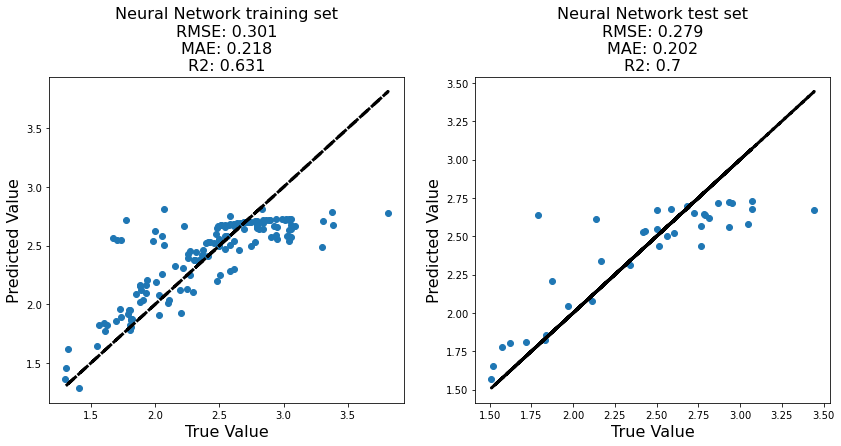

In [60]:
# Neural Network
nnregressor = nnr_gridsearch.best_estimator_
#nnregressor = MLPRegressor(random_state=12)

y_pred_train = []
y_pred_test = []

nnregressor.fit(X_train,y_train)
y_pred_train=nnregressor.predict(X_train)
y_pred_test=nnregressor.predict(X_test)

rmse, mae, R2 = plot('Neural Network', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['Neural Network'] = rmse
mae_scores['Neural Network'] = mae
R2_scores['Neural Network'] = R2

# Prediction

In [25]:
ABX3dat = pd.read_excel("Single.xlsx")
ABX3dat

,Unnamed: 0,Material,Cs,MA,FA,Rb,Pb,Cd,Bi,Sn,...,Cl,Br,I,S/D/T,Dimensionality,RA,RB,RX,Goldschmidt's,Bartel et al
0,0,CsPbCl3.0,1.0,0.0,0.0,0.0,1,0,0,0,...,3.0,0.0,0.0,1,0,188.0,119,181.0,0.869873,3.975564
1,1,Cs0.5MA0.5PbCl3.0,0.5,0.5,0.0,0.0,1,0,0,0,...,3.0,0.0,0.0,1,0,229.0,119,181.0,0.966525,3.460779
2,2,Cs0.5FA0.5PbCl3.0,0.5,0.0,0.5,0.0,1,0,0,0,...,3.0,0.0,0.0,1,0,233.5,119,181.0,0.977133,3.432009
3,3,Cs0.5Rb0.5PbCl3.0,0.5,0.0,0.0,0.5,1,0,0,0,...,3.0,0.0,0.0,1,0,180.0,119,181.0,0.851014,4.176115
4,4,MAPbCl3.0,0.0,1.0,0.0,0.0,1,0,0,0,...,3.0,0.0,0.0,1,0,270.0,119,181.0,1.063178,3.290338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1675,MA0.5FA0.5ZnI3.0,0.0,0.5,0.5,0.0,0,0,0,0,...,0.0,0.0,3.0,1,0,274.5,74,220.0,1.189514,4.802707
1676,1676,MA0.5Rb0.5ZnI3.0,0.0,0.5,0.0,0.5,0,0,0,0,...,0.0,0.0,3.0,1,0,221.0,74,220.0,1.060820,4.702607
1677,1677,FAZnI3.0,0.0,0.0,1.0,0.0,0,0,0,0,...,0.0,0.0,3.0,1,0,279.0,74,220.0,1.200339,4.813857
1678,1678,FA0.5Rb0.5ZnI3.0,0.0,0.0,0.5,0.5,0,0,0,0,...,0.0,0.0,3.0,1,0,225.5,74,220.0,1.071645,4.707802


In [26]:
preddat=ABX3dat.iloc[:,2:]
preddat

,Cs,MA,FA,Rb,Pb,Cd,Bi,Sn,Na,In,...,Cl,Br,I,S/D/T,Dimensionality,RA,RB,RX,Goldschmidt's,Bartel et al
0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,...,3.0,0.0,0.0,1,0,188.0,119,181.0,0.869873,3.975564
1,0.5,0.5,0.0,0.0,1,0,0,0,0,0,...,3.0,0.0,0.0,1,0,229.0,119,181.0,0.966525,3.460779
2,0.5,0.0,0.5,0.0,1,0,0,0,0,0,...,3.0,0.0,0.0,1,0,233.5,119,181.0,0.977133,3.432009
3,0.5,0.0,0.0,0.5,1,0,0,0,0,0,...,3.0,0.0,0.0,1,0,180.0,119,181.0,0.851014,4.176115
4,0.0,1.0,0.0,0.0,1,0,0,0,0,0,...,3.0,0.0,0.0,1,0,270.0,119,181.0,1.063178,3.290338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,0.0,0.5,0.5,0.0,0,0,0,0,0,0,...,0.0,0.0,3.0,1,0,274.5,74,220.0,1.189514,4.802707
1676,0.0,0.5,0.0,0.5,0,0,0,0,0,0,...,0.0,0.0,3.0,1,0,221.0,74,220.0,1.060820,4.702607
1677,0.0,0.0,1.0,0.0,0,0,0,0,0,0,...,0.0,0.0,3.0,1,0,279.0,74,220.0,1.200339,4.813857
1678,0.0,0.0,0.5,0.5,0,0,0,0,0,0,...,0.0,0.0,3.0,1,0,225.5,74,220.0,1.071645,4.707802


In [27]:
Predx=pipeline.transform(preddat)
Predx

array([[-0.0342427 , -0.40637115, -0.29942126, ..., -1.26113319,
        -0.80888617,  0.20885298],
       [-0.7129322 ,  2.35198795, -0.29942126, ..., -1.26113319,
         0.92735125, -1.71911212],
       [-0.7129322 , -0.40637115,  3.37207345, ..., -1.26113319,
         1.02489394, -1.81148606],
       ...,
       [-1.57487595, -0.40637115,  3.37374728, ...,  1.47104141,
         1.86344742,  4.44315595],
       [-1.57487595, -0.40637115,  3.37207345, ...,  1.47104141,
         1.56573105,  3.83358913],
       [-1.57487595, -0.40637115, -0.29942126, ...,  1.47104141,
         0.6666894 ,  3.95244826]])

In [28]:
Eg=rfregressor.predict(Predx)
Eg

array([3.03059006, 2.93678233, 2.93376916, ..., 1.94204379, 1.95616433,
       1.96701777])

In [29]:
ABX3datpred = pd.DataFrame(data=Eg,columns=['Eg'])
ABX3datpred

,Eg
0,3.030590
1,2.936782
2,2.933769
3,2.968391
4,2.983454
...,...
1675,1.936790
1676,1.955936
1677,1.942044
1678,1.956164


In [30]:
predval = pd.concat([ABX3dat,ABX3datpred],axis=1)
predval

,Unnamed: 0,Material,Cs,MA,FA,Rb,Pb,Cd,Bi,Sn,...,Br,I,S/D/T,Dimensionality,RA,RB,RX,Goldschmidt's,Bartel et al,Eg
0,0,CsPbCl3.0,1.0,0.0,0.0,0.0,1,0,0,0,...,0.0,0.0,1,0,188.0,119,181.0,0.869873,3.975564,3.030590
1,1,Cs0.5MA0.5PbCl3.0,0.5,0.5,0.0,0.0,1,0,0,0,...,0.0,0.0,1,0,229.0,119,181.0,0.966525,3.460779,2.936782
2,2,Cs0.5FA0.5PbCl3.0,0.5,0.0,0.5,0.0,1,0,0,0,...,0.0,0.0,1,0,233.5,119,181.0,0.977133,3.432009,2.933769
3,3,Cs0.5Rb0.5PbCl3.0,0.5,0.0,0.0,0.5,1,0,0,0,...,0.0,0.0,1,0,180.0,119,181.0,0.851014,4.176115,2.968391
4,4,MAPbCl3.0,0.0,1.0,0.0,0.0,1,0,0,0,...,0.0,0.0,1,0,270.0,119,181.0,1.063178,3.290338,2.983454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1675,MA0.5FA0.5ZnI3.0,0.0,0.5,0.5,0.0,0,0,0,0,...,0.0,3.0,1,0,274.5,74,220.0,1.189514,4.802707,1.936790
1676,1676,MA0.5Rb0.5ZnI3.0,0.0,0.5,0.0,0.5,0,0,0,0,...,0.0,3.0,1,0,221.0,74,220.0,1.060820,4.702607,1.955936
1677,1677,FAZnI3.0,0.0,0.0,1.0,0.0,0,0,0,0,...,0.0,3.0,1,0,279.0,74,220.0,1.200339,4.813857,1.942044
1678,1678,FA0.5Rb0.5ZnI3.0,0.0,0.0,0.5,0.5,0,0,0,0,...,0.0,3.0,1,0,225.5,74,220.0,1.071645,4.707802,1.956164


In [31]:
predval.to_excel("ABX3_eg_copy_rf.xlsx")

In [32]:
min(Eg)

1.368048533193293

(array([ 82.,  53.,  27., 259., 471., 345., 211., 115.,  70.,  47.]),
 array([1.36804853, 1.53430269, 1.70055684, 1.86681099, 2.03306514,
        2.1993193 , 2.36557345, 2.5318276 , 2.69808176, 2.86433591,
        3.03059006]),
 <BarContainer object of 10 artists>)

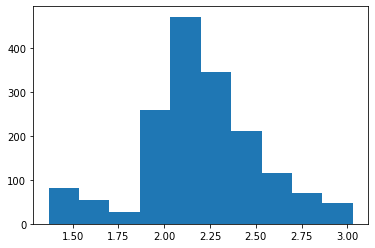

In [33]:
plt.hist(Eg)

In [34]:
predval11=predval.sort_values(by = 'Eg', axis=0, ascending=True, inplace=False, kind='quicksort')
predval11

,Unnamed: 0,Material,Cs,MA,FA,Rb,Pb,Cd,Bi,Sn,...,Br,I,S/D/T,Dimensionality,RA,RB,RX,Goldschmidt's,Bartel et al,Eg
1644,1644,MASnI3.0,0.0,1.0,0.0,0.0,0,0,0,1,...,0.0,3.0,1,0,270.0,118,220.0,1.025250,3.628732,1.368049
1649,1649,RbSnI3.0,0.0,0.0,0.0,1.0,0,0,0,1,...,0.0,3.0,1,0,172.0,118,220.0,0.820200,4.732743,1.376188
1646,1646,MA0.5Rb0.5SnI3.0,0.0,0.5,0.0,0.5,0,0,0,1,...,0.0,3.0,1,0,221.0,118,220.0,0.922725,3.849183,1.381540
1640,1640,CsSnI3.0,1.0,0.0,0.0,0.0,0,0,0,1,...,0.0,3.0,1,0,188.0,118,220.0,0.853678,4.285116,1.382630
1643,1643,Cs0.5Rb0.5SnI3.0,0.5,0.0,0.0,0.5,0,0,0,1,...,0.0,3.0,1,0,180.0,118,220.0,0.836939,4.476825,1.383378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,MAPbCl3.0,0.0,1.0,0.0,0.0,1,0,0,0,...,0.0,0.0,1,0,270.0,119,181.0,1.063178,3.290338,2.983454
13,13,Cs0.5Rb0.5CdCl3.0,0.5,0.0,0.0,0.5,0,1,0,0,...,0.0,0.0,1,0,180.0,95,181.0,0.925015,3.870052,2.986627
19,19,RbCdCl3.0,0.0,0.0,0.0,1.0,0,1,0,0,...,0.0,0.0,1,0,172.0,95,181.0,0.904516,3.955251,2.987963
40,40,CsEuCl3.0,1.0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,1,0,188.0,117,181.0,0.875711,3.935046,3.028677


In [36]:
double22dat = pd.read_excel("A2BBX6_2_2new.xlsx")
double22dat

,Unnamed: 0,Material,Cs,MA,FA,Rb,Pb,Cd,Bi,Sn,...,Cl,Br,I,S/D/T,Dimensionality,RA,RB,RX,Goldschmidt's,Bartel et al
0,0,Cs2PbCdCl6,2,0,0,0,1,1,0,0,...,6,0,0,2,0,188.0,107.0,181.0,0.906117,3.808992
1,1,CsMAPbCdCl6,1,1,0,0,1,1,0,0,...,6,0,0,2,0,229.0,107.0,181.0,1.006797,3.504319
2,2,CsFAPbCdCl6,1,0,1,0,1,1,0,0,...,6,0,0,2,0,233.5,107.0,181.0,1.017847,3.488070
3,3,CsRbPbCdCl6,1,0,0,1,1,1,0,0,...,6,0,0,2,0,180.0,107.0,181.0,0.886473,3.925875
4,4,MA2PbCdCl6,0,2,0,0,1,1,0,0,...,6,0,0,2,0,270.0,107.0,181.0,1.107477,3.417802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,4195,MAFAEuZnI6,0,1,1,0,0,0,0,0,...,0,0,6,2,0,274.5,95.5,220.0,1.108454,4.026034
4196,4196,MARbEuZnI6,0,1,0,1,0,0,0,0,...,0,0,6,2,0,221.0,95.5,220.0,0.988530,4.061753
4197,4197,FA2EuZnI6,0,0,2,0,0,0,0,0,...,0,0,6,2,0,279.0,95.5,220.0,1.118541,4.028696
4198,4198,FARbEuZnI6,0,0,1,1,0,0,0,0,...,0,0,6,2,0,225.5,95.5,220.0,0.998617,4.051888


In [37]:
double13dat = pd.read_excel("A2BBX6_1_3.xlsx")
double13dat

,Unnamed: 0,Material,Cs,MA,FA,Rb,Pb,Cd,Bi,Sn,...,Y,Cl,Br,I,Dimensionality,RA,RB,RX,Goldschmidt's,Bartel et al
0,0,Cs2BiNaCl6,2,0,0,0,0,0,1,0,...,0,6,0,0,0,188.0,102.5,181.0,0.920500,3.789608
1,1,CsMABiNaCl6,1,1,0,0,0,0,1,0,...,0,6,0,0,0,229.0,102.5,181.0,1.022778,3.545129
2,2,CsFABiNaCl6,1,0,1,0,0,0,1,0,...,0,6,0,0,0,233.5,102.5,181.0,1.034004,3.532762
3,3,CsRbBiNaCl6,1,0,0,1,0,0,1,0,...,0,6,0,0,0,180.0,102.5,181.0,0.900544,3.884511
4,4,MA2BiNaCl6,0,2,0,0,0,0,1,0,...,0,6,0,0,0,270.0,102.5,181.0,1.125056,3.485508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,5035,MAFAAgYI6,0,1,1,0,0,0,0,0,...,1,0,0,6,0,274.5,102.5,220.0,1.084394,3.864929
5036,5036,MARbAgYI6,0,1,0,1,0,0,0,0,...,1,0,0,6,0,221.0,102.5,220.0,0.967073,3.952664
5037,5037,FA2AgYI6,0,0,2,0,0,0,0,0,...,1,0,0,6,0,279.0,102.5,220.0,1.094262,3.864626
5038,5038,FARbAgYI6,0,0,1,1,0,0,0,0,...,1,0,0,6,0,225.5,102.5,220.0,0.976942,3.936600


In [55]:
sdt=np.ones(5040)
sdt=sdt*2

In [56]:
SDT=pd.DataFrame(data=sdt,columns={'S/D/T'})

In [57]:
double13dat2=pd.concat([double13dat.iloc[:,1:24],SDT,double13dat.iloc[:,24:]],axis=1)
double13dat2

,Material,Cs,MA,FA,Rb,Pb,Cd,Bi,Sn,Na,...,Cl,Br,S/D/T,I,Dimensionality,RA,RB,RX,Goldschmidt's,Bartel et al
0,Cs2BiNaCl6,2,0,0,0,0,0,1,0,1,...,6,0,2.0,0,0,188.0,102.5,181.0,0.920500,3.789608
1,CsMABiNaCl6,1,1,0,0,0,0,1,0,1,...,6,0,2.0,0,0,229.0,102.5,181.0,1.022778,3.545129
2,CsFABiNaCl6,1,0,1,0,0,0,1,0,1,...,6,0,2.0,0,0,233.5,102.5,181.0,1.034004,3.532762
3,CsRbBiNaCl6,1,0,0,1,0,0,1,0,1,...,6,0,2.0,0,0,180.0,102.5,181.0,0.900544,3.884511
4,MA2BiNaCl6,0,2,0,0,0,0,1,0,1,...,6,0,2.0,0,0,270.0,102.5,181.0,1.125056,3.485508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,MAFAAgYI6,0,1,1,0,0,0,0,0,0,...,0,0,2.0,6,0,274.5,102.5,220.0,1.084394,3.864929
5036,MARbAgYI6,0,1,0,1,0,0,0,0,0,...,0,0,2.0,6,0,221.0,102.5,220.0,0.967073,3.952664
5037,FA2AgYI6,0,0,2,0,0,0,0,0,0,...,0,0,2.0,6,0,279.0,102.5,220.0,1.094262,3.864626
5038,FARbAgYI6,0,0,1,1,0,0,0,0,0,...,0,0,2.0,6,0,225.5,102.5,220.0,0.976942,3.936600


In [59]:
double=pd.concat([double22dat,double13dat2],axis=0)
double

,Unnamed: 0,Material,Cs,MA,FA,Rb,Pb,Cd,Bi,Sn,...,Cl,Br,I,S/D/T,Dimensionality,RA,RB,RX,Goldschmidt's,Bartel et al
0,0.0,Cs2PbCdCl6,2,0,0,0,1,1,0,0,...,6,0,0,2.0,0,188.0,107.0,181.0,0.906117,3.808992
1,1.0,CsMAPbCdCl6,1,1,0,0,1,1,0,0,...,6,0,0,2.0,0,229.0,107.0,181.0,1.006797,3.504319
2,2.0,CsFAPbCdCl6,1,0,1,0,1,1,0,0,...,6,0,0,2.0,0,233.5,107.0,181.0,1.017847,3.488070
3,3.0,CsRbPbCdCl6,1,0,0,1,1,1,0,0,...,6,0,0,2.0,0,180.0,107.0,181.0,0.886473,3.925875
4,4.0,MA2PbCdCl6,0,2,0,0,1,1,0,0,...,6,0,0,2.0,0,270.0,107.0,181.0,1.107477,3.417802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,NaN,MAFAAgYI6,0,1,1,0,0,0,0,0,...,0,0,6,2.0,0,274.5,102.5,220.0,1.084394,3.864929
5036,NaN,MARbAgYI6,0,1,0,1,0,0,0,0,...,0,0,6,2.0,0,221.0,102.5,220.0,0.967073,3.952664
5037,NaN,FA2AgYI6,0,0,2,0,0,0,0,0,...,0,0,6,2.0,0,279.0,102.5,220.0,1.094262,3.864626
5038,NaN,FARbAgYI6,0,0,1,1,0,0,0,0,...,0,0,6,2.0,0,225.5,102.5,220.0,0.976942,3.936600


In [60]:
double = double.reset_index(drop= True)
double

,Unnamed: 0,Material,Cs,MA,FA,Rb,Pb,Cd,Bi,Sn,...,Cl,Br,I,S/D/T,Dimensionality,RA,RB,RX,Goldschmidt's,Bartel et al
0,0.0,Cs2PbCdCl6,2,0,0,0,1,1,0,0,...,6,0,0,2.0,0,188.0,107.0,181.0,0.906117,3.808992
1,1.0,CsMAPbCdCl6,1,1,0,0,1,1,0,0,...,6,0,0,2.0,0,229.0,107.0,181.0,1.006797,3.504319
2,2.0,CsFAPbCdCl6,1,0,1,0,1,1,0,0,...,6,0,0,2.0,0,233.5,107.0,181.0,1.017847,3.488070
3,3.0,CsRbPbCdCl6,1,0,0,1,1,1,0,0,...,6,0,0,2.0,0,180.0,107.0,181.0,0.886473,3.925875
4,4.0,MA2PbCdCl6,0,2,0,0,1,1,0,0,...,6,0,0,2.0,0,270.0,107.0,181.0,1.107477,3.417802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,NaN,MAFAAgYI6,0,1,1,0,0,0,0,0,...,0,0,6,2.0,0,274.5,102.5,220.0,1.084394,3.864929
9236,NaN,MARbAgYI6,0,1,0,1,0,0,0,0,...,0,0,6,2.0,0,221.0,102.5,220.0,0.967073,3.952664
9237,NaN,FA2AgYI6,0,0,2,0,0,0,0,0,...,0,0,6,2.0,0,279.0,102.5,220.0,1.094262,3.864626
9238,NaN,FARbAgYI6,0,0,1,1,0,0,0,0,...,0,0,6,2.0,0,225.5,102.5,220.0,0.976942,3.936600


In [62]:
double2=double.iloc[:,1:]

In [63]:
double2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Material        9240 non-null   object 
 1   Cs              9240 non-null   int64  
 2   MA              9240 non-null   int64  
 3   FA              9240 non-null   int64  
 4   Rb              9240 non-null   int64  
 5   Pb              9240 non-null   int64  
 6   Cd              9240 non-null   int64  
 7   Bi              9240 non-null   int64  
 8   Sn              9240 non-null   int64  
 9   Na              9240 non-null   int64  
 10  In              9240 non-null   int64  
 11  Sb              9240 non-null   int64  
 12  K               9240 non-null   int64  
 13  Cu              9240 non-null   int64  
 14  Ag              9240 non-null   int64  
 15  Mn              9240 non-null   int64  
 16  Eu              9240 non-null   int64  
 17  Zn              9240 non-null   i

In [64]:
doubledat=double2.iloc[:,1:]

In [65]:
Predx2=pipeline.transform(doubledat)
Predx2

array([[ 0.96348277, -0.40637115, -0.29942126, ..., -1.26113319,
         0.08949668, -0.47169514],
       [-0.0342427 ,  2.50517925, -0.29942126, ..., -1.26113319,
         1.24814382, -1.57620124],
       [-0.0342427 , -0.40637115,  3.37374728, ..., -1.26113319,
         1.31620645, -1.62997464],
       ...,
       [-1.57487595, -0.40637115,  3.37375446, ...,  1.47104141,
         1.64101708, -0.25039558],
       [-1.57487595, -0.40637115,  3.37374728, ...,  1.47104141,
         1.02322304,  0.044835  ],
       [-1.57487595, -0.40637115, -0.29942126, ...,  1.47104141,
        -1.15488393,  2.12509385]])

In [66]:
Eg2=rfregressor.predict(Predx2)
Eg2

array([2.97161105, 2.9031783 , 2.903335  , ..., 2.20163622, 2.19944463,
       2.19770489])

In [67]:
doubledatpred = pd.DataFrame(data=Eg2,columns=['Eg'])
doubledatpred

,Eg
0,2.971611
1,2.903178
2,2.903335
3,3.020999
4,2.923096
...,...
9235,2.200213
9236,2.208356
9237,2.201636
9238,2.199445


In [68]:
predval2 = pd.concat([double2,doubledatpred],axis=1)
predval2

,Material,Cs,MA,FA,Rb,Pb,Cd,Bi,Sn,Na,...,Br,I,S/D/T,Dimensionality,RA,RB,RX,Goldschmidt's,Bartel et al,Eg
0,Cs2PbCdCl6,2,0,0,0,1,1,0,0,0,...,0,0,2.0,0,188.0,107.0,181.0,0.906117,3.808992,2.971611
1,CsMAPbCdCl6,1,1,0,0,1,1,0,0,0,...,0,0,2.0,0,229.0,107.0,181.0,1.006797,3.504319,2.903178
2,CsFAPbCdCl6,1,0,1,0,1,1,0,0,0,...,0,0,2.0,0,233.5,107.0,181.0,1.017847,3.488070,2.903335
3,CsRbPbCdCl6,1,0,0,1,1,1,0,0,0,...,0,0,2.0,0,180.0,107.0,181.0,0.886473,3.925875,3.020999
4,MA2PbCdCl6,0,2,0,0,1,1,0,0,0,...,0,0,2.0,0,270.0,107.0,181.0,1.107477,3.417802,2.923096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,MAFAAgYI6,0,1,1,0,0,0,0,0,0,...,0,6,2.0,0,274.5,102.5,220.0,1.084394,3.864929,2.200213
9236,MARbAgYI6,0,1,0,1,0,0,0,0,0,...,0,6,2.0,0,221.0,102.5,220.0,0.967073,3.952664,2.208356
9237,FA2AgYI6,0,0,2,0,0,0,0,0,0,...,0,6,2.0,0,279.0,102.5,220.0,1.094262,3.864626,2.201636
9238,FARbAgYI6,0,0,1,1,0,0,0,0,0,...,0,6,2.0,0,225.5,102.5,220.0,0.976942,3.936600,2.199445


In [69]:
predval2.to_excel("double_eg_new.xlsx")

In [70]:
predval21=predval2.sort_values(by = 'Eg', axis=0, ascending=True, inplace=False, kind='quicksort')
predval21

,Material,Cs,MA,FA,Rb,Pb,Cd,Bi,Sn,Na,...,Br,I,S/D/T,Dimensionality,RA,RB,RX,Goldschmidt's,Bartel et al,Eg
2801,CsMASnEuClBr2I3,1,1,0,0,0,0,0,1,0,...,2,3,2.0,0,229.0,117.5,205.5,0.951345,3.669637,1.537960
4154,MA2SnEuI6,0,2,0,0,0,0,0,1,0,...,0,6,2.0,0,270.0,117.5,220.0,1.026769,3.634261,1.538822
2802,CsFASnEuClBr2I3,1,0,1,0,0,0,0,1,0,...,2,3,2.0,0,233.5,117.5,205.5,0.961197,3.642642,1.541609
2806,MARbSnEuClBr2I3,0,1,0,1,0,0,0,1,0,...,2,3,2.0,0,221.0,117.5,205.5,0.933828,3.726265,1.541645
4064,MA2PbSnI6,0,2,0,0,1,0,0,1,0,...,0,6,2.0,0,270.0,118.5,220.0,1.023736,3.623336,1.541879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,CsRbBiNaCl4Br2,1,0,0,1,0,0,1,0,1,...,2,0,2.0,0,180.0,102.5,186.0,0.897193,3.933292,3.264656
4740,Cs2BiNaCl4Br2,2,0,0,0,0,0,1,0,1,...,2,0,2.0,0,188.0,102.5,186.0,0.916804,3.838388,3.287126
4383,CsRbBiNaCl5Br,1,0,0,1,0,0,1,0,1,...,1,0,2.0,0,180.0,102.5,183.5,0.898854,3.908902,3.298585
4200,Cs2BiNaCl6,2,0,0,0,0,0,1,0,1,...,0,0,2.0,0,188.0,102.5,181.0,0.920500,3.789608,3.305551


(array([ 684.,   22.,  622., 3627., 1834.,  686., 1165.,  435.,  134.,
          31.]),
 array([1.53796017, 1.71612197, 1.89428377, 2.07244557, 2.25060737,
        2.42876917, 2.60693097, 2.78509277, 2.96325457, 3.14141637,
        3.31957817]),
 <BarContainer object of 10 artists>)

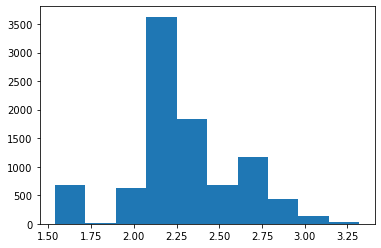

In [71]:
plt.hist(Eg2)